In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib.dates import HourLocator, DateFormatter
from dateutil.parser import ParserError

In [ ]:
bitcoin_data = pd.read_csv('bitcoin_data.csv')

In [ ]:
bitcoin_data['timestampp'] = pd.to_datetime(bitcoin_data['timestampp'])

In [ ]:
# Set 'timestamp' column as index
bitcoin_data.set_index('timestampp', inplace=True)

In [ ]:
# Removing duplicate timestamps if any
bitcoin_data = bitcoin_data[~bitcoin_data.index.duplicated(keep='first')]

In [ ]:
# Resampling data to hourly frequency and fill missing values
bitcoin_data = bitcoin_data.resample('H').ffill()

In [ ]:
# Defining the number of hours for prediction
forecast_hours = 24

In [ ]:
model = LinearRegression()

In [ ]:
# Extracting features and target variable
X = bitcoin_data.index.to_julian_date().values.reshape(-1, 1)
y = bitcoin_data['closee'].values
model.fit(X, y)

LinearRegression()

In [ ]:
while True:
    input_date = input("Enter a date for prediction (in month/day/year format, e.g., 07-01-2023): ")
    try:
        pd.to_datetime(input_date)  # Check if the input date is valid
        break
    except ParserError:
        print("Invalid date format. Please enter the date in the format 'MM-DD-YYYY'.")

# Making future dataframe for prediction
future_dates = pd.date_range(start=input_date, periods=forecast_hours, freq='H')

# Forecasting future prices
future_dates_julian = future_dates.to_julian_date().values.reshape(-1, 1)
forecast = model.predict(future_dates_julian)

exchange_rate = 83

print("\nPredicted Bitcoin Prices for the Next 24 Hours:")
for date, price in zip(future_dates, forecast):
    price_in_rupees = price * exchange_rate
    print(f"{date}: ${price:.2f} (₹{price_in_rupees:.2f} in rupees)")

Enter a date for prediction (in month/day/year format, e.g., 07-01-2023): 10-16-2024

Predicted Bitcoin Prices for the Next 24 Hours:
2024-10-16 00:00:00: $37531.08 (₹3115079.77 in rupees)
2024-10-16 01:00:00: $37531.84 (₹3115142.36 in rupees)
2024-10-16 02:00:00: $37532.59 (₹3115204.96 in rupees)
2024-10-16 03:00:00: $37533.34 (₹3115267.56 in rupees)
2024-10-16 04:00:00: $37534.10 (₹3115330.16 in rupees)
2024-10-16 05:00:00: $37534.85 (₹3115392.75 in rupees)
2024-10-16 06:00:00: $37535.61 (₹3115455.35 in rupees)
2024-10-16 07:00:00: $37536.36 (₹3115517.95 in rupees)
2024-10-16 08:00:00: $37537.11 (₹3115580.54 in rupees)
2024-10-16 09:00:00: $37537.87 (₹3115643.14 in rupees)
2024-10-16 10:00:00: $37538.62 (₹3115705.74 in rupees)
2024-10-16 11:00:00: $37539.38 (₹3115768.34 in rupees)
2024-10-16 12:00:00: $37540.13 (₹3115830.93 in rupees)
2024-10-16 13:00:00: $37540.89 (₹3115893.53 in rupees)
2024-10-16 14:00:00: $37541.64 (₹3115956.13 in rupees)
2024-10-16 15:00:00: $37542.39 (₹3116018.

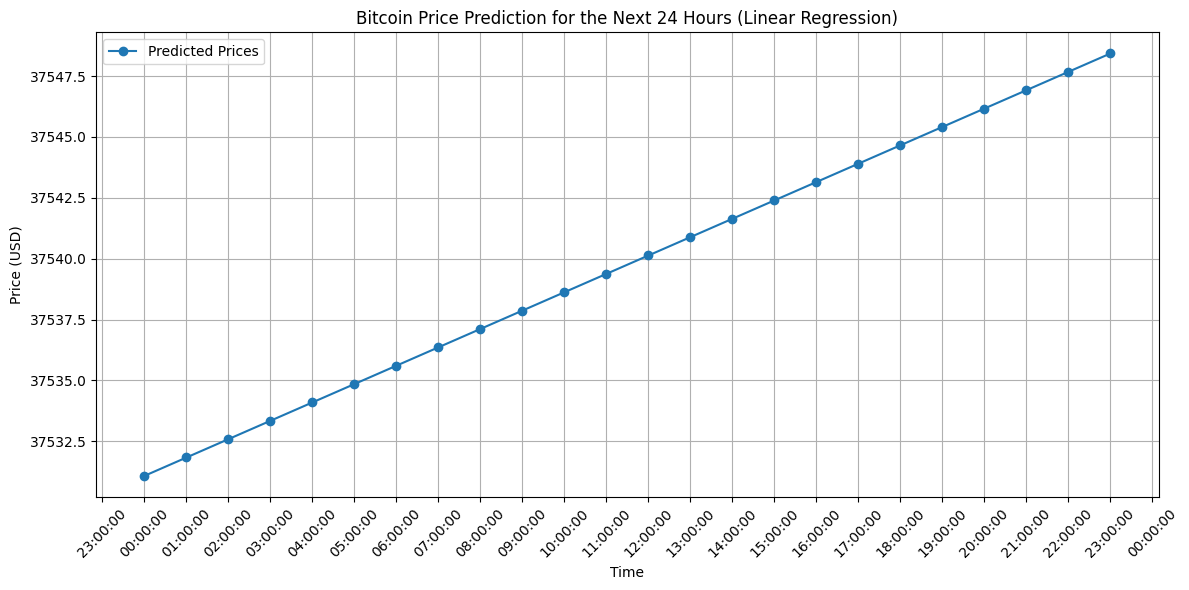

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(future_dates, forecast, label='Predicted Prices', linestyle='-', marker='o')
plt.title('Bitcoin Price Prediction for the Next 24 Hours (Linear Regression)')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(HourLocator(interval=1))  # Setting ticks every hour
plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))  # Formatting time as HH:MM:SS
plt.tight_layout()
plt.show()